In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print ("Setup Complete")

Setup Complete


In [2]:
df = pd.read_csv("housing.csv")
# 10 data teratas
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
from sklearn.model_selection import train_test_split

x = df.drop(['median_house_value'], axis = 1) 
y = df['median_house_value']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [6]:
train_data = x_train.join(y_train)

In [7]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19291,-122.86,38.42,38.0,1166.0,223.0,584.0,225.0,3.6667,<1H OCEAN,244400.0
13761,-117.09,34.01,37.0,106.0,18.0,27.0,12.0,4.0556,INLAND,131300.0
3356,-120.66,40.42,35.0,1450.0,325.0,717.0,297.0,2.5074,INLAND,66400.0
9332,-122.64,38.01,36.0,1336.0,258.0,678.0,249.0,5.5789,NEAR OCEAN,292000.0
4779,-118.32,34.04,47.0,1989.0,532.0,1430.0,519.0,1.8333,<1H OCEAN,151100.0
...,...,...,...,...,...,...,...,...,...,...
7646,-118.27,33.81,42.0,865.0,208.0,811.0,218.0,3.8621,<1H OCEAN,165300.0
13435,-117.44,34.10,43.0,1614.0,400.0,926.0,349.0,2.0750,INLAND,95100.0
10315,-117.82,33.85,18.0,1810.0,305.0,1189.0,326.0,5.2227,<1H OCEAN,213500.0
14117,-117.11,32.73,34.0,1096.0,221.0,574.0,223.0,3.8355,NEAR OCEAN,126700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

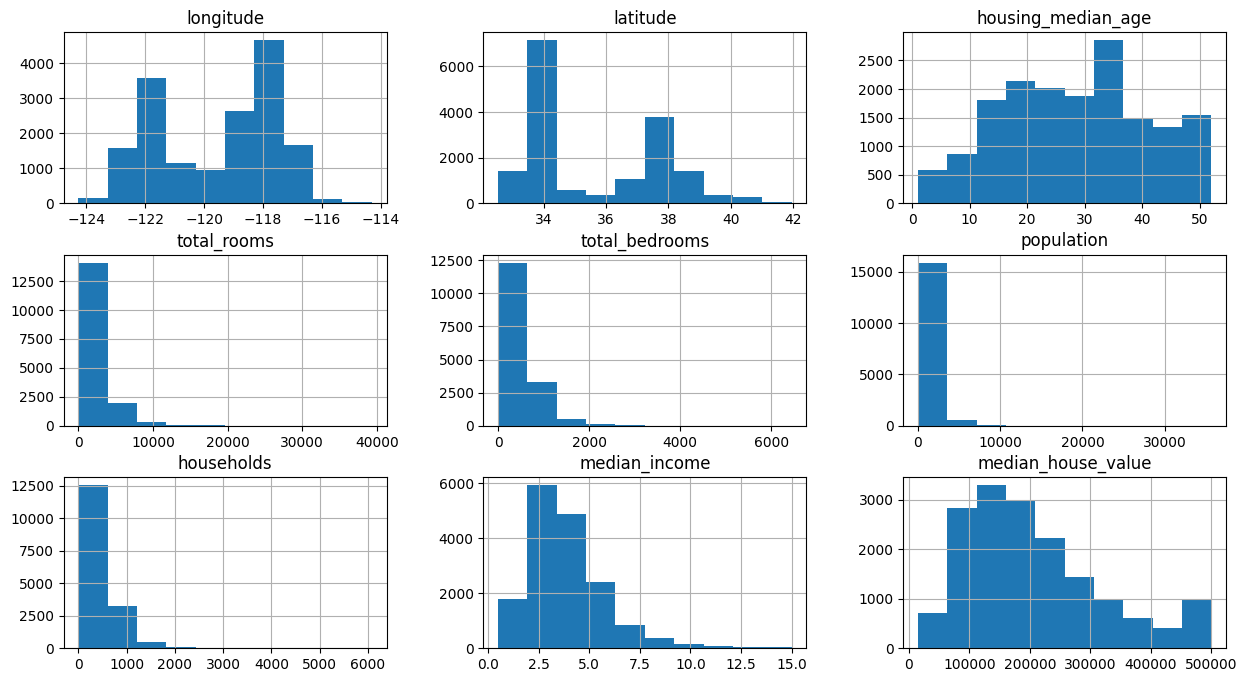

In [8]:
train_data.hist(figsize=(15,8))

<Axes: >

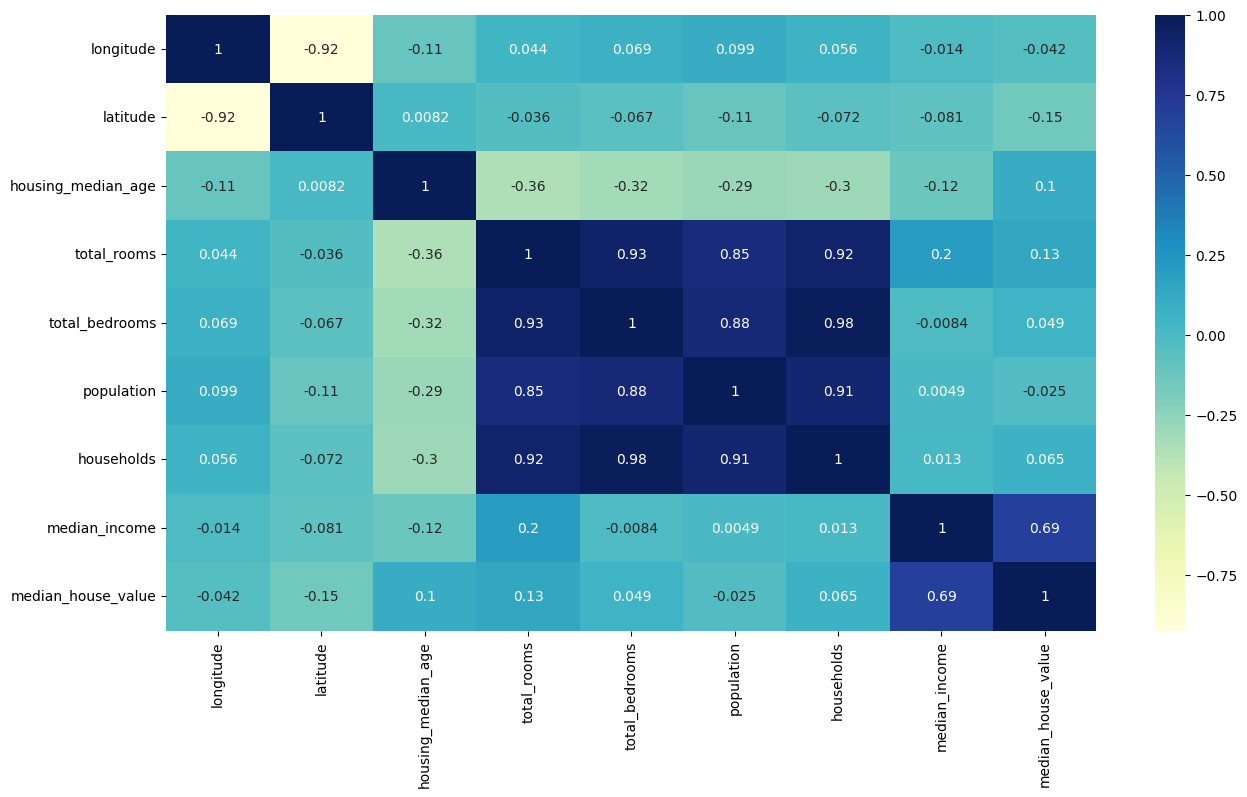

In [9]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.select_dtypes(include=['number']).corr(), annot=True, cmap="YlGnBu")

In [10]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

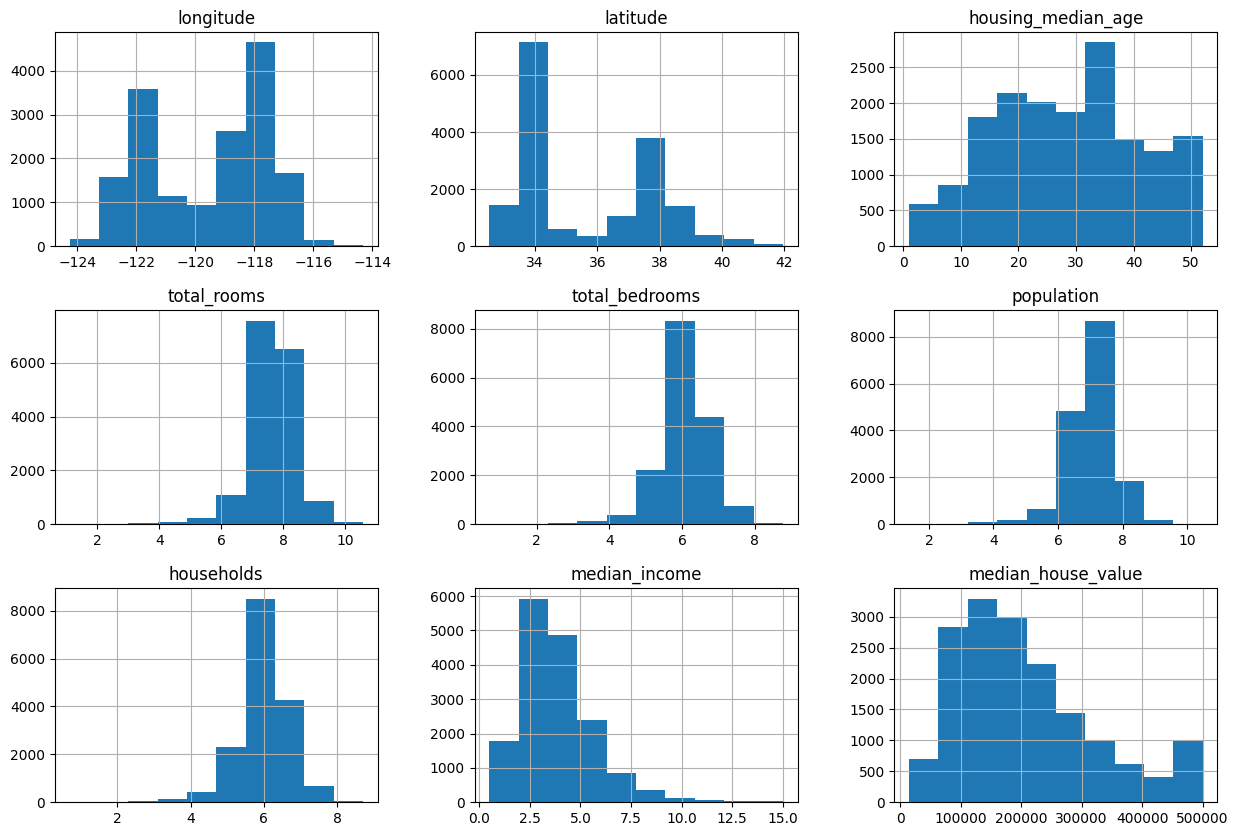

In [11]:
train_data.hist(figsize=(15,10))

In [12]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7310
INLAND        5223
NEAR OCEAN    2136
NEAR BAY      1838
ISLAND           5
Name: count, dtype: int64

In [13]:
#train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

<Axes: >

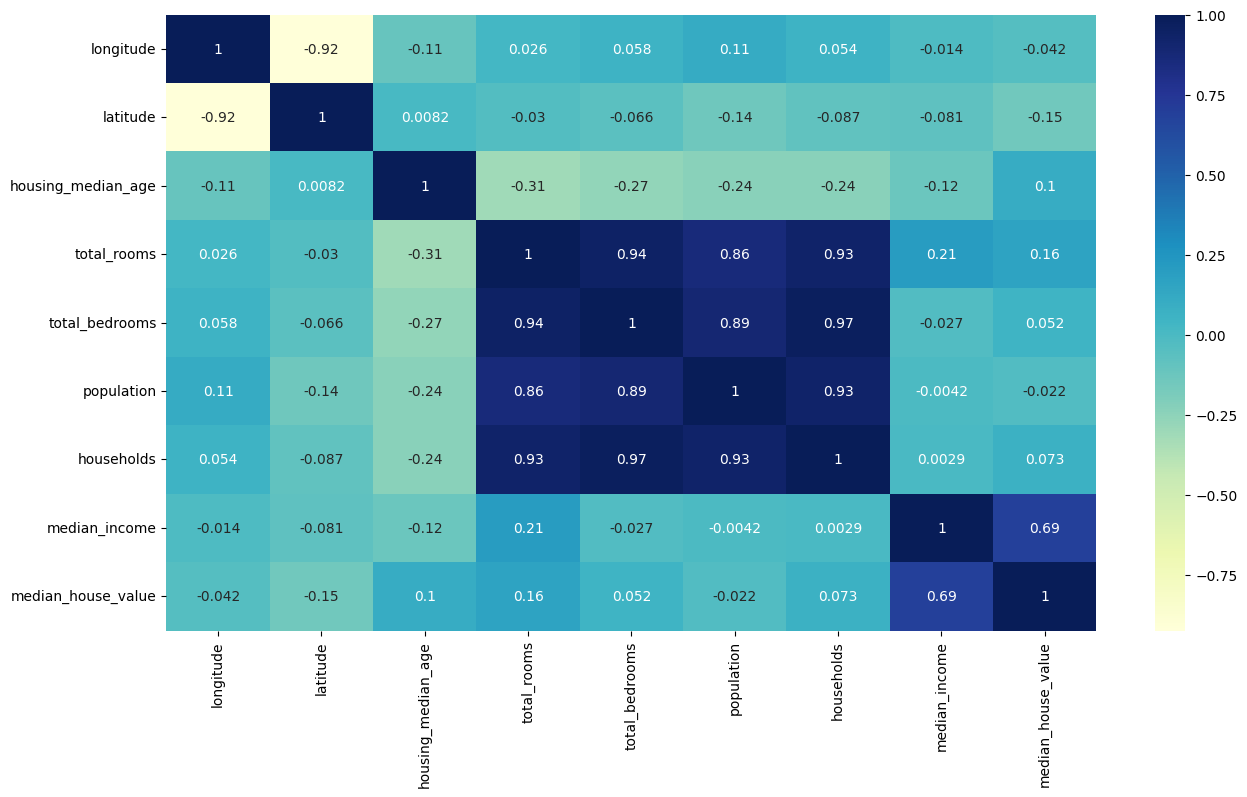

In [14]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.select_dtypes(include=['number']).corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

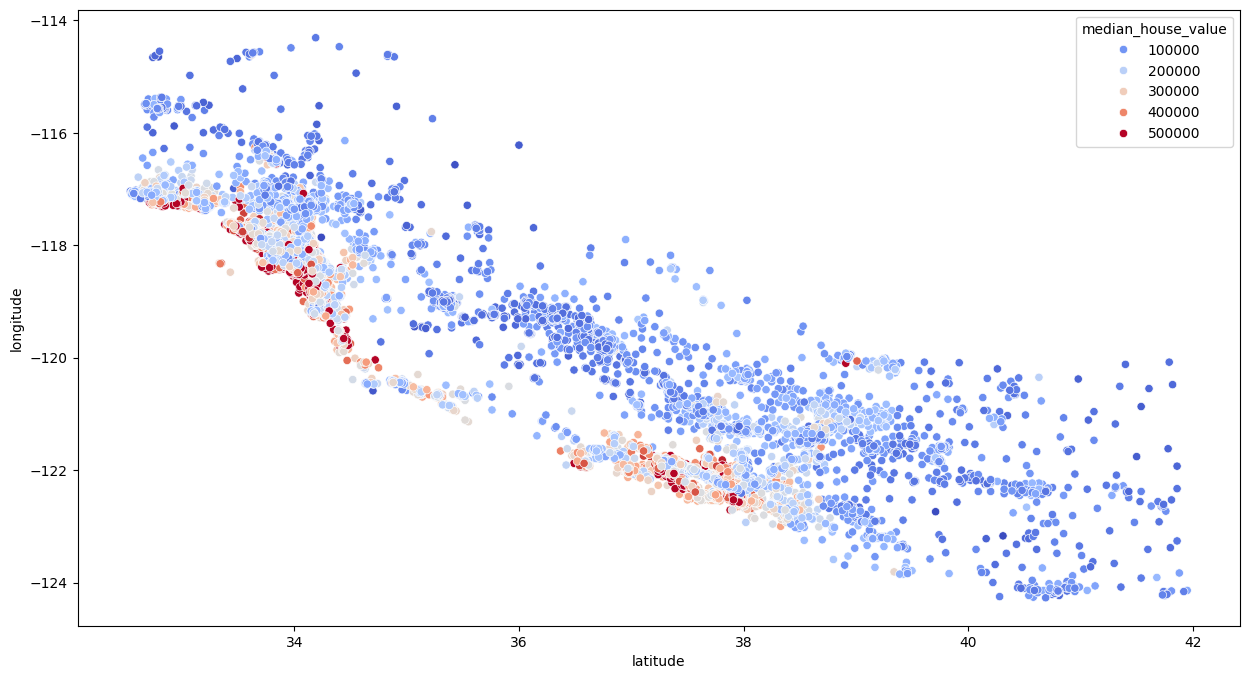

In [15]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [16]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

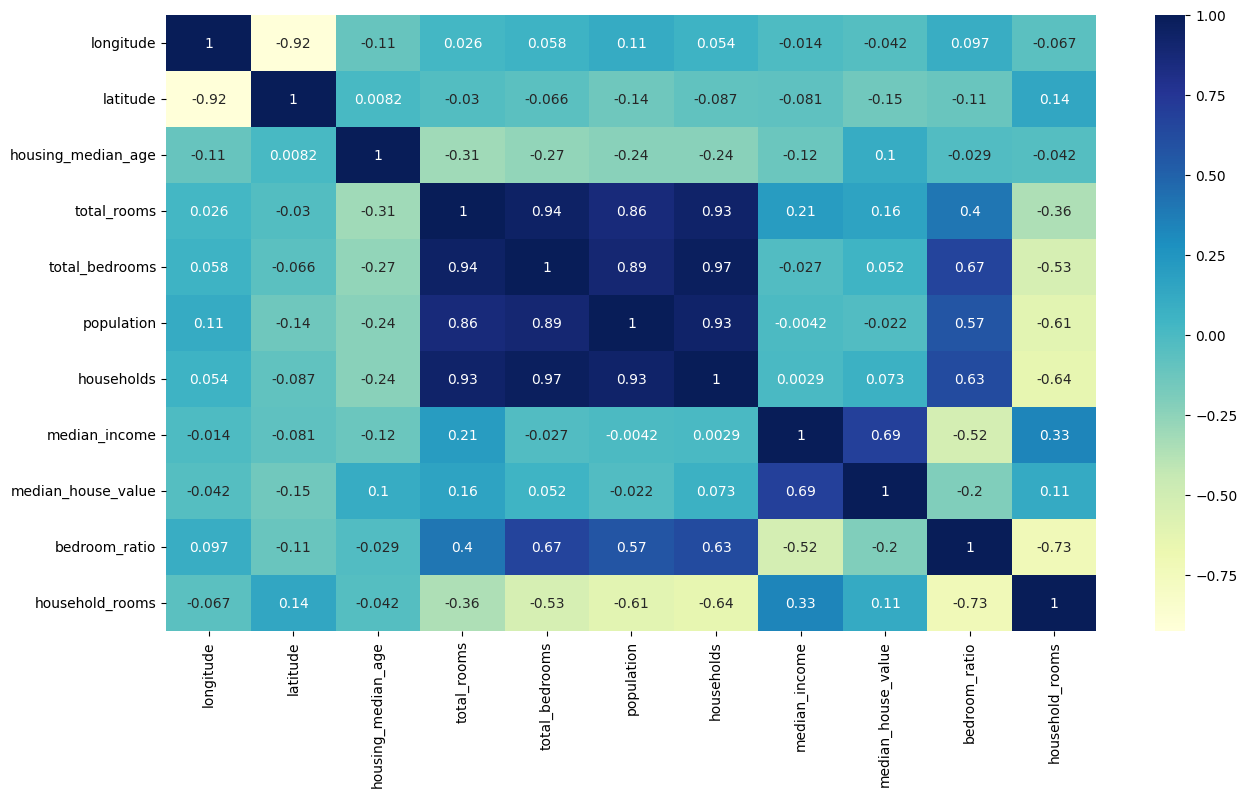

In [17]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.select_dtypes(include=['number']).corr(), annot=True, cmap="YlGnBu")

In [18]:
train_data = train_data.replace([np.inf, -np.inf], np.nan).dropna()

In [19]:
from sklearn.linear_model import LinearRegression

train_data = pd.get_dummies(train_data, columns=['ocean_proximity'])
x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()
reg.fit(x_train, y_train)


LinearRegression()

In [20]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'], prefix="ocean_proximity")).drop(['ocean_proximity'], axis=1)


test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [21]:
print("Fitur di x_train tapi tidak di x_test:", set(x_train.columns) - set(x_test.columns))
print("Fitur di x_test tapi tidak di x_train:", set(x_test.columns) - set(x_train.columns))

Fitur di x_train tapi tidak di x_test: {'bedroom_ratio', 'ocean_proximity_NEAR BAY', 'ocean_proximity_ISLAND', 'ocean_proximity_INLAND', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_NEAR OCEAN', 'household_rooms'}
Fitur di x_test tapi tidak di x_train: {'ocean_proximity'}


In [22]:
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)

In [23]:
x_test = x_test[x_train.columns]

In [24]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [25]:
missing_features = set(x_train.columns) - set(x_test.columns)
print("Fitur yang hilang di x_test:", missing_features)


Fitur yang hilang di x_test: {'ocean_proximity_ISLAND'}


In [26]:
for feature in missing_features:
    x_test[feature] = 0

In [27]:
x_test = x_test[x_train.columns]


In [28]:
print(x_test.isnull().sum())
x_test = x_test.dropna()
y_test = y_test.loc[x_test.index]
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean") 
x_test = pd.DataFrame(imputer.fit_transform(x_test), columns=x_test.columns)



longitude                      0
latitude                       0
housing_median_age             0
total_rooms                    0
total_bedrooms                36
population                     0
households                     0
median_income                  0
bedroom_ratio                 36
household_rooms                0
ocean_proximity_<1H OCEAN      0
ocean_proximity_INLAND         0
ocean_proximity_ISLAND         0
ocean_proximity_NEAR BAY       0
ocean_proximity_NEAR OCEAN     0
dtype: int64


In [29]:
reg.score(x_test, y_test)


0.6755005997085863

In [30]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [31]:
forest.score(x_test, y_test)

0.8213254591503039

In [32]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100,200,300],
    "min_samples_split": [2,4],
    "max_depth": [None,4,8] 
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [34]:
grid_search.best_estimator_.score(x_test, y_test)

0.8223714732795071